# Juego con embedings

## Pre-trained embedings
[Pre-trained Word Vectors for Spanish](https://www.kaggle.com/datasets/rtatman/pretrained-word-vectors-for-spanish) [Download](https://www.kaggle.com/datasets/rtatman/pretrained-word-vectors-for-spanish/download?datasetVersionNumber=1)

1,000,653 words coded as 300 position vectors
In this data-set there is a differentiation between capitalized words and lowercase words so that words such as 'El' or 'el' are different words

## BrainStorming

### Ranking similarity
Una pantalla con una palabra clave y un listado de palabras (grande). El juego consiste en ordenar las palabras por cercania a la palabra clave en un tiempo limite; a partir de esa ordenación se saca una puntuación en función de lo bien que se hallan ordenado las palabras.

### Find the imposter
Tambien una pantalla con una palabra clave y un listado de palabras pero esta vez el jugador debe encontrar la palabra que no está relacionada con la palabra clave. El jugador dispondra de un tiempo limite para encontrar esta palabra.

### Poker
Simular un poker de cinco cartas en el que la puntuación se extrae en función de la combinación de palabras que obtienes.
Se compitiria contra otros jugadores (NPCs). ¿Posibilidad de apostar?

## Elección de juego
Hemos elegido desarrollar el juego de Poker.

## Desarrollo
Este juego va a constar de una panatalla como la siguiente:

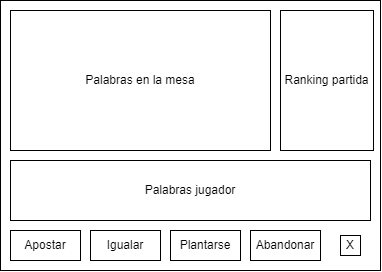

Cada jugador empezará con X monedas que se podrán ir apostando.

Cuando un jugador se quede sin monedas será eliminado del juego.

Fases:

    1. Se reparten N cartas a cada jugador.
    2. El jugador decide si entrar en la partida o no.
    3. El repartidor enseña M cartas sobre la mesa.
    4. Empiezan las apuestas:
        4.1. Si alguien realiza alguna apuesta:
            4.1.1. Cualquier jugador puede aumentarla.
            4.1.2. Cualquier jugador puede aceptarla.
            4.1.3. Cualquier jugador puede retirarse.
        4.2 Si no se hace ninguna apuesta se pasa a la siguiente fase.
    5. El repartidor enseña una carta mas y se vuelve al paso 4.
    6. Cuando haya L cartas sobre la mesa se realiza una ultima vez el paso 4 y se enseñan las cartas.
    7. El jugador con mas puntuación se lleva todas las apuestas.
        
Puntuaciones de mejor a peor:

    Poker: 4 palabras relacionadas.
    Full: 2 palabras relacionadas y 3 palabras relacionadas.
    Trio: 3 palabras relacionadas.
    Doble pareja: 2 y 2 palabras relacionadas.
    Una pareja: 2 palabras relacionadas.
    
En caso de un empate se mirará la distancia entre los embedings y gana el que tenga una menor distancia acumulada.
    

## JUEGO POKER

### Limpia del dataset
Filtramos las palabras que nos interesan del conjunto de embeddings

In [1]:
lista = []
with open('words_to_ignore/spanish_stopwords.txt', encoding='utf8') as f:
    a = f.readlines()
    for i in range(len(a)):
        lista.append(a[i].strip('\n'))
with open('words_to_ignore/world-cities.csv', encoding='utf8') as f:
    f.readline()
    for line in f:
        aux = line.split(',')[0].split()
        for a in aux:
            lista.append(a.lower())
with open('words_to_ignore/female_names.csv', encoding='utf8') as f:
    f.readline()
    for line in f:
        aux = line.split(',')[0].split()
        for a in aux:
            lista.append(a.lower())
with open('words_to_ignore/male_names.csv', encoding='utf8') as f:
    f.readline()
    for line in f:
        aux = line.split(',')[0].split()
        for a in aux:
            lista.append(a.lower())
with open('words_to_ignore/surnames_freq_ge_100.csv', encoding='utf8') as f:
    f.readline()
    for line in f:
        aux = line.split(',')[0].split()
        for a in aux:
            lista.append(a.lower())
with open('words_to_ignore/surnames_freq_ge_20_le_99.csv', encoding='utf8') as f:
    f.readline()
    for line in f:
        aux = line.split(',')[0].split()
        for a in aux:
            lista.append(a.lower())
            
# Escribo el nuevo fichero
emb = open('SBW-vectors-300-min5.txt', 'r', encoding='utf8')
nuevo = open('embeddings.txt', 'w', encoding='utf8')
emb.readline()     # Saltamos la cabecera del fichero
for line in emb:
    a = line.split()[0]
    if a[0].islower() and a not in lista:
        nuevo.write(line)
emb.close()
nuevo.close()

### Importaciones y dataset de embeddings
Cargamos todas las dependencia y almacenamos los embeddings

In [1]:
import pygame
import pandas as pd
import numpy as np

columnas = ['palabra']
for i in range(300):
    columnas.append('valor' + str(i+1))
embeddings = pd.read_csv("embeddings.txt", sep=' ', skiprows=0, names=columnas, header=None, engine='c').values

pygame 2.3.0 (SDL 2.24.2, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Ejecutamos el juego

In [2]:
from Partida import Partida
import numpy as np

p = Partida(4, embeddings)

while(True):
    for fase in p.jugar_ronda():
        pass
        
    for jugador in p.jugadores:
        print('fichas: ', jugador.fichas)
    print('fichas j: ', p.jugador.fichas)
    
    
    p.decision = input()
    if p.decision == 'exit':
        break

apuesta maxima:  32
jugadores restantes:  3
apuesta maxima:  4
jugadores restantes:  3
apuesta maxima:  1
jugadores restantes:  3
fichas:  13
fichas:  161
fichas:  13
fichas:  50
fichas j:  13


KeyboardInterrupt: Interrupted by user

In [3]:
# No hacer caso, probablemente mejor hacer una imagen en photoshop
def printGui(screen):
    table_corners = [[14.4, 19.2], [504.0, 259.2]]
    ranking_corners = [[518.4, 19.2], [698.4, 259.2]]
    player_corners = [[14.4, 278.4], [698.4, 384.0]]
    button_corners = [
        [[14.4, 403.2], [172.8, 456.0]],
        [[187.2, 403.2], [345.6, 456.0]],
        [[360.0, 403.2], [518.4, 456.0]],
        [[532.8, 403.2], [691.2, 456.0]]
    ]
    
    # Table
    pygame.draw.rect(
        screen,
        "red",
        pygame.Rect(
            table_corners[0][0],
            table_corners[0][1],
            table_corners[1][0] - table_corners[0][0],
            table_corners[1][1] - table_corners[0][1]
        ),
        width=1
    )
    
    # Ranking
    pygame.draw.rect(
        screen,
        "green",
        pygame.Rect(
            ranking_corners[0][0],
            ranking_corners[0][1],
            ranking_corners[1][0] - ranking_corners[0][0],
            ranking_corners[1][1] - ranking_corners[0][1]
        ),
        width=1
    )
    
    # Player
    pygame.draw.rect(
        screen,
        "blue",
        pygame.Rect(
            player_corners[0][0],
            player_corners[0][1],
            player_corners[1][0] - player_corners[0][0],
            player_corners[1][1] - player_corners[0][1]
        ),
        width=1
    )
    
    # Button 1
    pygame.draw.rect(
        screen,
        "black",
        pygame.Rect(
            button_corners[0][0][0],
            button_corners[0][0][1],
            button_corners[0][1][0] - button_corners[0][0][0],
            button_corners[0][1][1] - button_corners[0][0][1]
        ),
        width=1
    )
    
    # Button 2
    pygame.draw.rect(
        screen,
        "black",
        pygame.Rect(
            button_corners[1][0][0],
            button_corners[1][0][1],
            button_corners[1][1][0] - button_corners[1][0][0],
            button_corners[1][1][1] - button_corners[1][0][1]
        ),
        width=1
    )
    
    # Button 3
    pygame.draw.rect(
        screen,
        "black",
        pygame.Rect(
            button_corners[2][0][0],
            button_corners[2][0][1],
            button_corners[2][1][0] - button_corners[2][0][0],
            button_corners[2][1][1] - button_corners[2][0][1]
        ),
        width=1
    )
    
    # Button 4
    pygame.draw.rect(
        screen,
        "black",
        pygame.Rect(
            button_corners[3][0][0],
            button_corners[3][0][1],
            button_corners[3][1][0] - button_corners[3][0][0],
            button_corners[3][1][1] - button_corners[3][0][1]
        ),
        width=1
    )

In [4]:
def printCard(screen, name = 'Unamed Card', x = 0, y = 0):
    font_size = 32
    font_color = 'white'
    bg_color = 'black'
    
    card_font = pygame.font.Font('freesansbold.ttf', font_size)
    
    
    text = card_font.render(name, True, font_color, bg_color)
    textRect = text.get_rect()
    textRect.center = (x, y)
    screen.blit(text, textRect)

In [13]:
def printTexts(screen):
    table_corners = [[14.4, 19.2],[504.0, 259.2]]
    ranking_corners = [[518.4, 19.2],[698.4, 259.2]]
    player_corners = [[14.4, 278.4],[698.4, 384.0]]
    button_corners = [
        [[14.4, 403.2], [172.8, 456.0]],
        [[187.2, 403.2], [345.6, 456.0]],
        [[360.0, 403.2], [518.4, 456.0]],
        [[532.8, 403.2], [691.2, 456.0]]
    ]
    
    # Imprimo las cartas del jugador
    centros_player_width_offset = (player_corners[1][0] - player_corners[0][0]) // 4
    centros_player_height_offset = (player_corners[1][1] - player_corners[0][1]) // 2 + player_corners[0][1]
    
    printCard(screen, 'Palabra 1', player_corners[0][0] + centros_player_width_offset, centros_player_height_offset)
    printCard(screen, 'Palabra 2', player_corners[0][0] + centros_player_width_offset*3, centros_player_height_offset)
    
    # Imprimo las cartas de la mesa
    centros_table_width_2card_offset = (table_corners[1][0] - table_corners[0][0]) // 4
    centros_table_width_1card_offset = (table_corners[1][0] - table_corners[0][0]) // 2
    centros_table_height_offset = (table_corners[1][1] - table_corners[0][1]) // 5
    
    printCard(screen, 'Palabra 3', table_corners[0][0] + centros_table_width_2card_offset, centros_table_height_offset + table_corners[0][1])
    printCard(screen, 'Palabra 4', table_corners[0][0] + centros_table_width_2card_offset*3, centros_table_height_offset + table_corners[0][1])
    
    printCard(screen, 'Palabra 5', table_corners[0][0] + centros_table_width_1card_offset, centros_table_height_offset*2.5 + table_corners[0][1])
    
    printCard(screen, 'Palabra 6', table_corners[0][0] + centros_table_width_2card_offset, centros_table_height_offset*4 + table_corners[0][1])
    printCard(screen, 'Palabra 7', table_corners[0][0] + centros_table_width_2card_offset*3, centros_table_height_offset*4 + table_corners[0][1])

In [14]:
import pygame

# pygame setup
pygame.init()
screen = pygame.display.set_mode((720, 480))
running = True

while running:
    # poll for events
    # pygame.QUIT event means the user clicked X to close your window
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # fill the screen with a color to wipe away anything from last frame
    screen.fill("white")
    printGui(screen)
    
    printTexts(screen)
    
    # flip() the display to put your work on screen
    pygame.display.flip()
    
pygame.quit()